In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import mysql.connector as cnt

DB = cnt.connect(
    host = '88.223.121.130',
    user = 'user',
    password = 'slaptazodis',
    port = 3306
)

cur = DB.cursor()

In [15]:
plt.style.use('seaborn-v0_8-dark-palette')

In [16]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [17]:
ei_16 = pd.read_json('EI_2016 12 31.json')
ei_17 = pd.read_json('EI_2017 12 31.json')
ei_18 = pd.read_json('EI_2018 12 31.json')
ei_19 = pd.read_json('EI_2019 12 31.json')
ei_20 = pd.read_json('EI_2020 12 31.json')
ei_21 = pd.read_json('EI_2021 12 31.json')

Užduotis
Kaip keitėsi eismo saugumo situacija 2016-2021 metais? Skaičiavau girtų/apsvaigusių ir blaivų vairuotojų kiekį. Daugiausia eismo įvykių įvyko kai vairuotojas buvo blaivus. Suskaičiavau kaip oro sąlygos įtakojo eismą. Daugiausia eismo įvykių įvyko kai buvo giedra, šiek tiek mažiau kai apsiniaukę.

C:\Users\lenik\AppData\Local\Temp\ipykernel_4908\4247048748.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  eis = pd.read_sql_query(sql, con = DB)


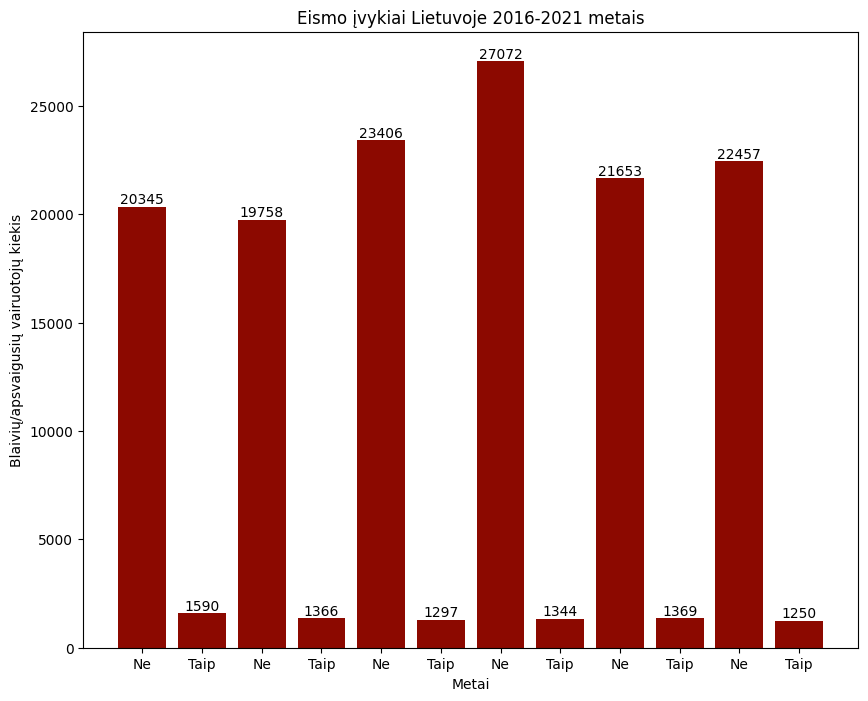

In [21]:
sql = """select count(*), neblaivusKaltininkai from works.EismIvyk2016
group by neblaivusKaltininkai
union select count(*), neblaivusKaltininkai from works.EismIvyk2017
group by neblaivusKaltininkai
union select count(*), neblaivusKaltininkai from works.EismIvyk2018
group by neblaivusKaltininkai
union select count(*), neblaivusKaltininkai from works.EismIvyk2019
group by neblaivusKaltininkai
union select count(*), neblaivusKaltininkai from works.EismIvyk2020
group by neblaivusKaltininkai
union select count(*), neblaivusKaltininkai from works.EismIvyk2021
group by neblaivusKaltininkai;"""
eis = pd.read_sql_query(sql, con = DB)
x = np.arange(1, len(eis['neblaivusKaltininkai'].values)+1)   
  
fig, ax = plt.subplots(figsize=(10,8))
a = ax.bar(x, eis['count(*)'].values)
ax.bar(x, eis['count(*)'].values)
r = ax.bar(x, eis['count(*)'].values)
ax.bar_label(r)
ax.bar_label(a)
ax.set_xticks(x)
ax.set_xticklabels(eis['neblaivusKaltininkai'].values, rotation=0)
ax.set_ylabel('Blaivių/apsvaigusių vairuotojų kiekis')
ax.set_xlabel('Metai')
ax.set_title('Eismo įvykiai Lietuvoje 2016-2021 metais')



plt.show()

C:\Users\lenik\AppData\Local\Temp\ipykernel_4908\2511130019.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  eis16 = pd.read_sql_query(sql, con = DB)


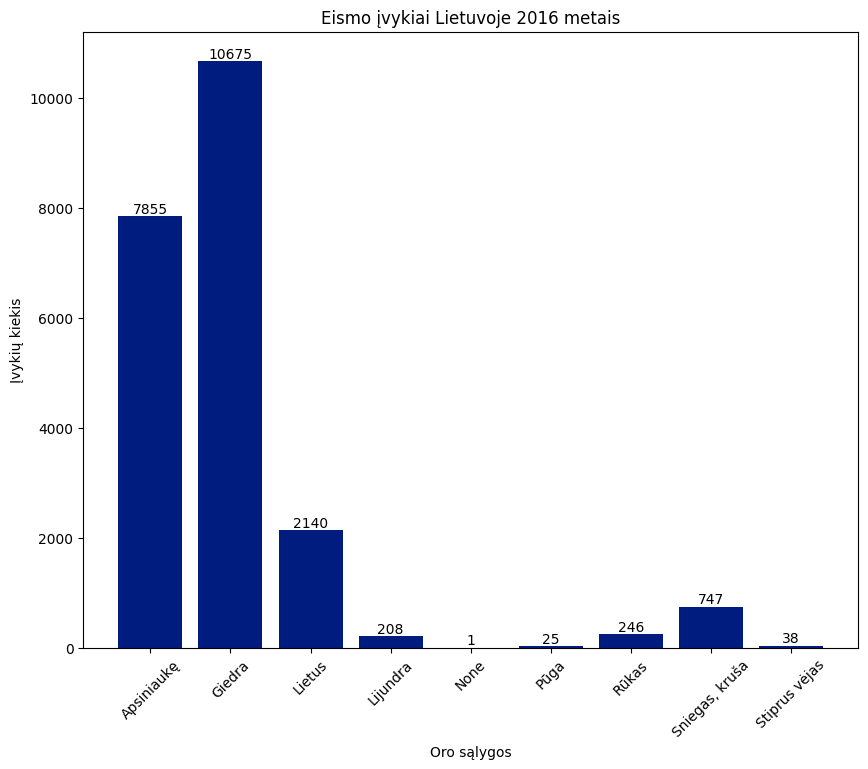

In [6]:
sql = """SELECT count(*), meteoSalygos FROM works.EismIvyk2016 group by meteoSalygos;"""
eis16 = pd.read_sql_query(sql, con = DB)


x = np.arange(1, len(eis16['meteoSalygos'].values)+1)
fig, ax = plt.subplots(figsize=(10,8))
r1 = ax.bar(x, eis16['count(*)'].values)
ax.bar_label(r1)
ax.set_xticks(x)
ax.set_xticklabels(eis16['meteoSalygos'].values, rotation=45)
ax.set_ylabel('Įvykių kiekis')
ax.set_xlabel('Oro sąlygos')
ax.set_title('Eismo įvykiai Lietuvoje 2016 metais')


plt.show()

C:\Users\lenik\AppData\Local\Temp\ipykernel_4908\861300363.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  eis17 = pd.read_sql_query(sql, con = DB)


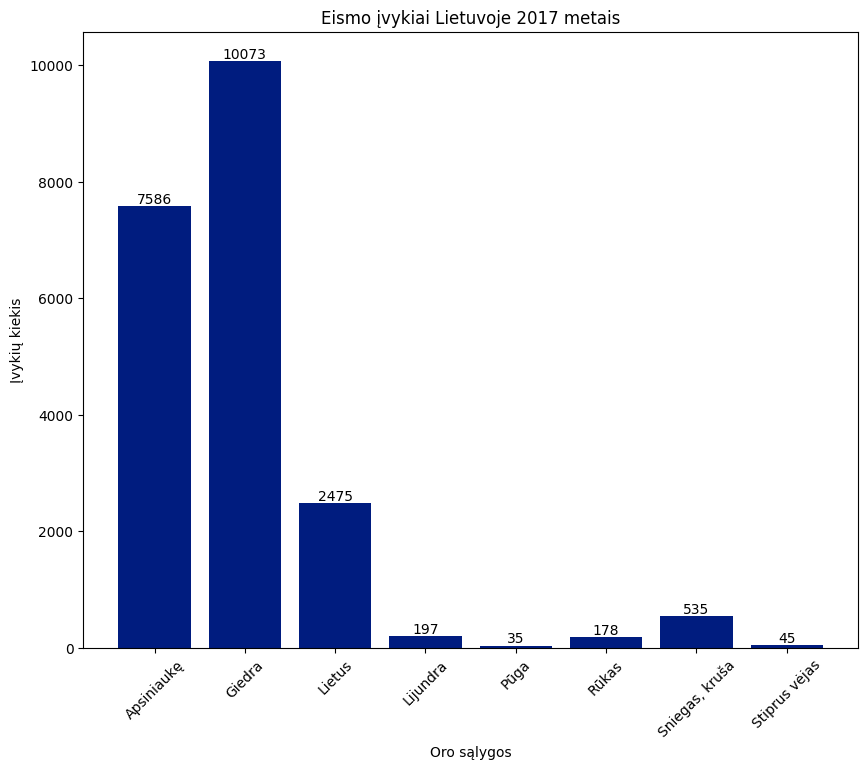

In [7]:
sql = """SELECT count(*), meteoSalygos FROM works.EismIvyk2017 group by meteoSalygos;"""
eis17 = pd.read_sql_query(sql, con = DB)

x = np.arange(1, len(eis17['meteoSalygos'].values)+1)
fig, ax = plt.subplots(figsize=(10,8))
r2 = ax.bar(x, eis17['count(*)'].values)
ax.bar_label(r2)
ax.set_xticks(x)
ax.set_xticklabels(eis17['meteoSalygos'].values, rotation=45)
ax.set_ylabel('Įvykių kiekis')
ax.set_xlabel('Oro sąlygos')
ax.set_title('Eismo įvykiai Lietuvoje 2017 metais')

plt.show()

C:\Users\lenik\AppData\Local\Temp\ipykernel_4908\253615163.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  eis18 = pd.read_sql_query(sql, con = DB)


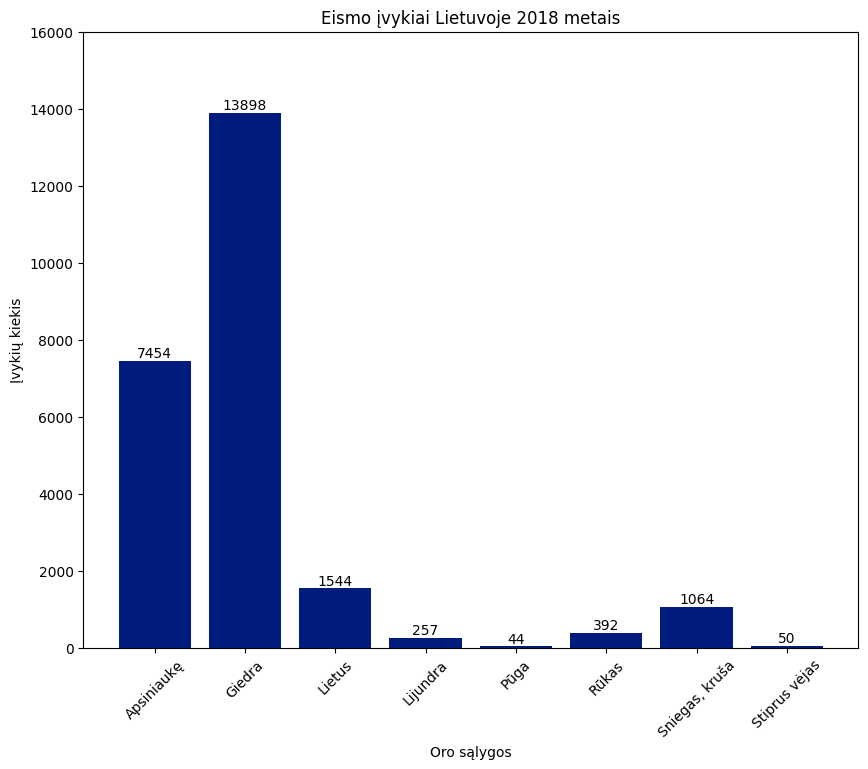

In [8]:
sql = """SELECT count(*), meteoSalygos FROM works.EismIvyk2018 group by meteoSalygos;"""
eis18 = pd.read_sql_query(sql, con = DB)

x = np.arange(1, len(eis18['meteoSalygos'].values)+1)
fig, ax = plt.subplots(figsize=(10,8))
r3 = ax.bar(x, eis18['count(*)'].values)
ax.bar_label(r3)
ax.set_xticks(x)
ax.set_xticklabels(eis18['meteoSalygos'].values, rotation=45)
ax.set_ylabel('Įvykių kiekis')
ax.set_xlabel('Oro sąlygos')
ax.set_title('Eismo įvykiai Lietuvoje 2018 metais')
ax.set_yticks([0,2000,4000,6000,8000,10000,12000,14000,16000])

plt.show()

C:\Users\lenik\AppData\Local\Temp\ipykernel_4908\1520960997.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  eis19 = pd.read_sql_query(sql, con = DB)


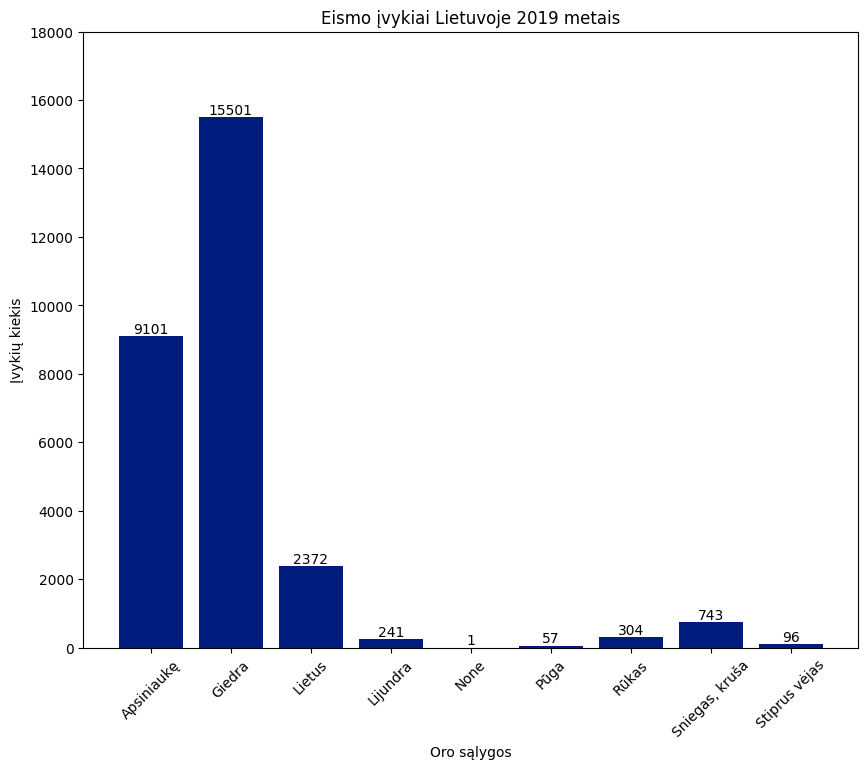

In [9]:
sql = """SELECT count(*), meteoSalygos FROM works.EismIvyk2019 group by meteoSalygos;"""
eis19 = pd.read_sql_query(sql, con = DB)

x = np.arange(1, len(eis19['meteoSalygos'].values)+1)
fig, ax = plt.subplots(figsize=(10,8))
r1 = ax.bar(x, eis19['count(*)'].values)
ax.bar_label(r1)
ax.set_xticks(x)
ax.set_xticklabels(eis19['meteoSalygos'].values, rotation=45)
ax.set_ylabel('Įvykių kiekis')
ax.set_xlabel('Oro sąlygos')
ax.set_title('Eismo įvykiai Lietuvoje 2019 metais')
ax.set_yticks([0,2000,4000,6000,8000,10000,12000,14000,16000,18000])

plt.show()

C:\Users\lenik\AppData\Local\Temp\ipykernel_4908\1926363864.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  eis20 = pd.read_sql_query(sql, con = DB)


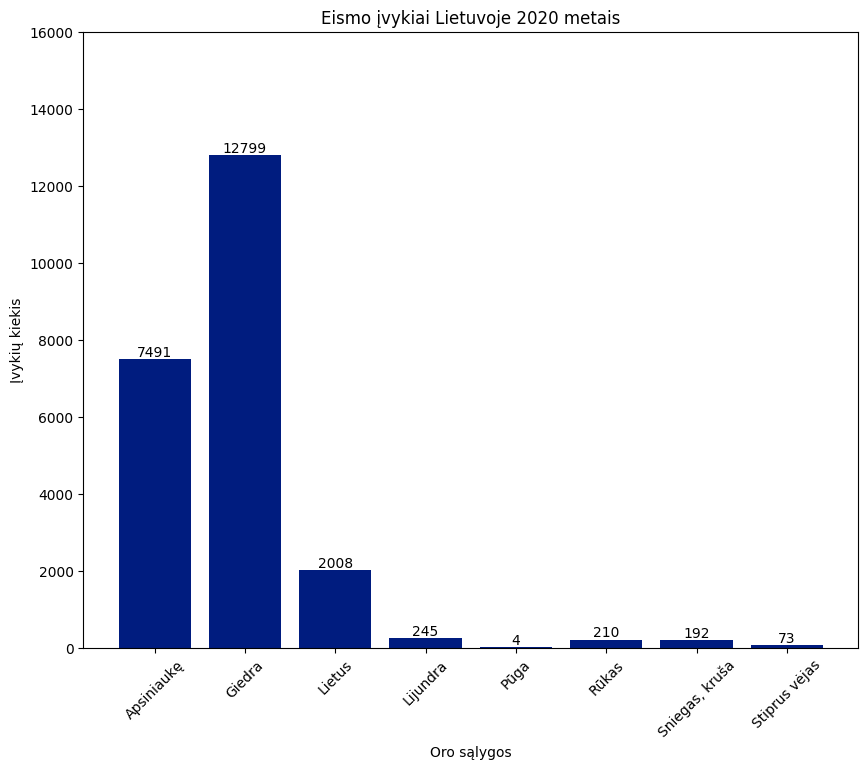

In [10]:
sql = """SELECT count(*), meteoSalygos FROM works.EismIvyk2020 group by meteoSalygos;"""
eis20 = pd.read_sql_query(sql, con = DB)

x = np.arange(1, len(eis20['meteoSalygos'].values)+1)
fig, ax = plt.subplots(figsize=(10,8))
r1 = ax.bar(x, eis20['count(*)'].values)
ax.bar_label(r1)
ax.set_xticks(x)
ax.set_xticklabels(eis20['meteoSalygos'].values, rotation=45)
ax.set_ylabel('Įvykių kiekis')
ax.set_xlabel('Oro sąlygos')
ax.set_title('Eismo įvykiai Lietuvoje 2020 metais')
ax.set_yticks([0,2000,4000,6000,8000,10000,12000,14000,16000])

plt.show()

C:\Users\lenik\AppData\Local\Temp\ipykernel_4908\740812173.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  eis21 = pd.read_sql_query(sql, con = DB)


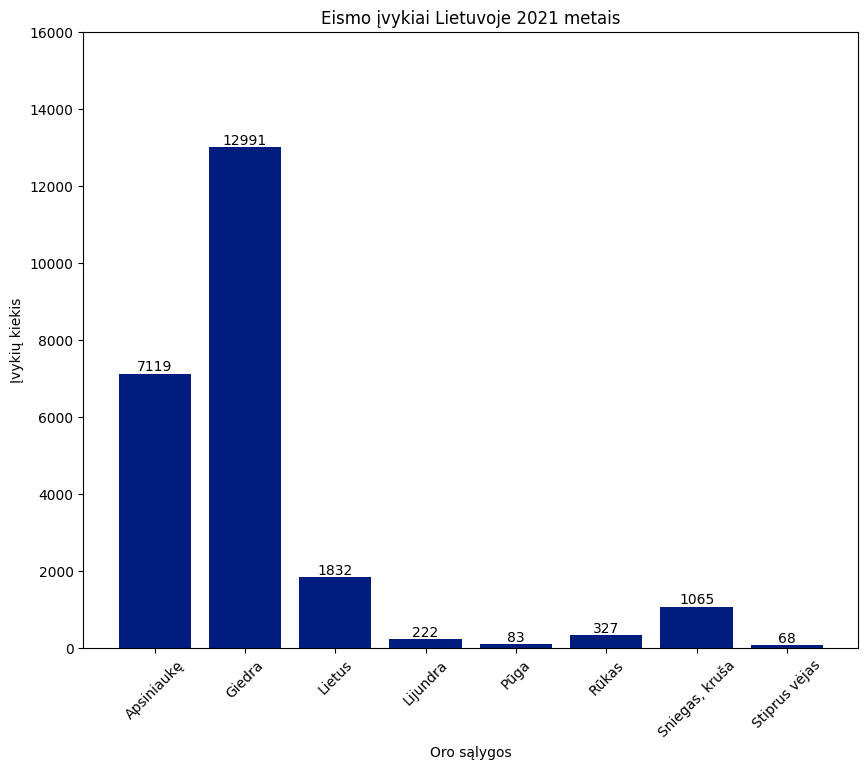

In [11]:
sql = """SELECT count(*), meteoSalygos FROM works.EismIvyk2021 group by meteoSalygos;"""
eis21 = pd.read_sql_query(sql, con = DB)

x = np.arange(1, len(eis21['meteoSalygos'].values)+1)
fig, ax = plt.subplots(figsize=(10,8))
r1 = ax.bar(x, eis21['count(*)'].values)
ax.bar_label(r1)
ax.set_xticks(x)
ax.set_xticklabels(eis21['meteoSalygos'].values, rotation=45)
ax.set_ylabel('Įvykių kiekis')
ax.set_xlabel('Oro sąlygos')
ax.set_title('Eismo įvykiai Lietuvoje 2021 metais')
ax.set_yticks([0,2000,4000,6000,8000,10000,12000,14000,16000])

plt.show()